# Amazon Music Clustering

Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
#Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Importing encoders, scalers libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Importing pipeline libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [5]:
# Importing clustering algorithms from sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats

In [6]:
# Importing metrics and dimensionality reduction techniques
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Data Exploration & Preprocessing

Load the dataset into a Pandas DataFrame.

In [7]:
#Load the dataset
music_data=pd.read_csv('/content/single_genre_artists.csv')
music_data.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [8]:
#Get a summary of the dataset
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [9]:
#Get statistical summary of the dataset
music_data.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [10]:
#Check for missing values
music_data.isnull().sum()

,0
id_songs,0
name_song,0
popularity_songs,0
duration_ms,0
explicit,0
id_artists,0
release_date,0
danceability,0
energy,0
key,0


In [11]:
#Check for duplicate entries
music_data.duplicated().sum()

np.int64(0)

In [12]:
#Check the shape of the dataset
music_data.shape

(95837, 23)

In [13]:
#Display the columns of the dataset
music_data.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [14]:
music_data=music_data.drop(columns=['name_song','name_artists','id_songs'],axis=True)

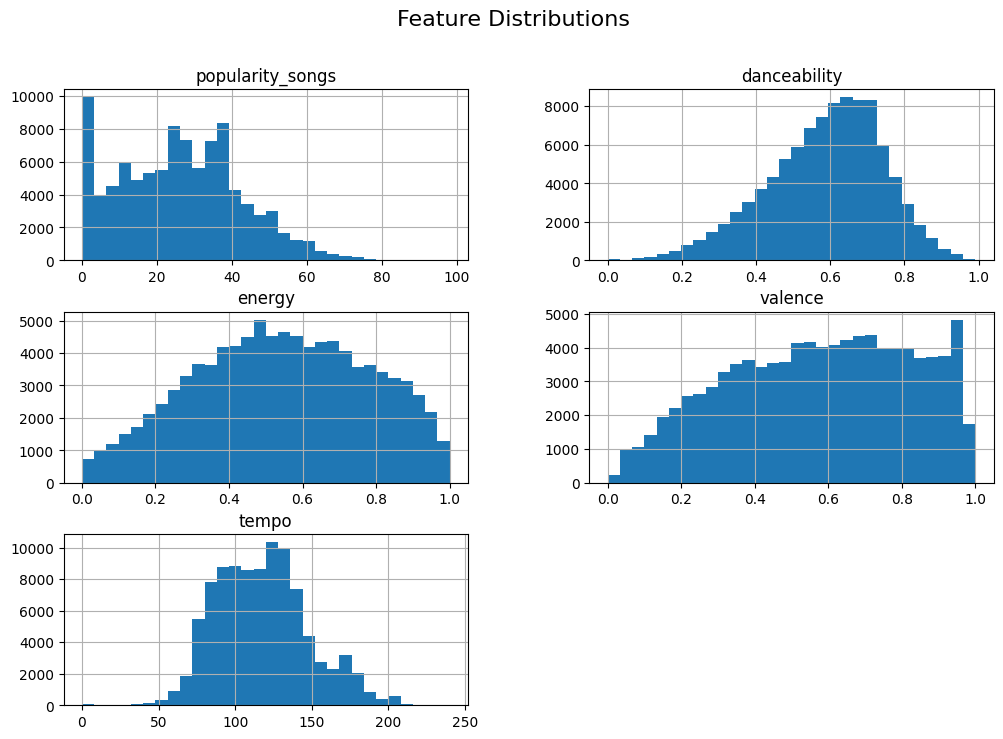

In [15]:


key_features =['popularity_songs', 'danceability', 'energy', 'valence', 'tempo']

music_data[key_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [16]:
music_data.head()

,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,popularity_artists
0,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],22
1,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],22
2,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],22
3,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,-12.393,0,0.1650,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],22
4,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,-13.806,1,0.1380,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],22


In [17]:
# Columns used for clustering in your original df
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
scaler.fit(music_data[features])  # fit only on these numeric features

# Now transform uploaded song with same columns
music_data_scaled = scaler.transform(music_data[features])

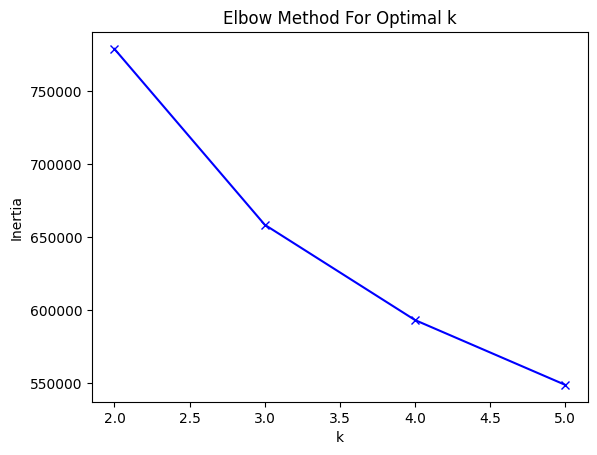

In [18]:
# K-Means Clustering with Elbow Method and Silhouette Score
# -------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
inertia = []  #Inertia is a metric used to evaluate how well the K-means clustering algorithm has performed.
K = range(2,6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(music_data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

k=2, Silhouette Score: 0.2032
k=3, Silhouette Score: 0.2423
k=4, Silhouette Score: 0.2310
k=5, Silhouette Score: 0.1864


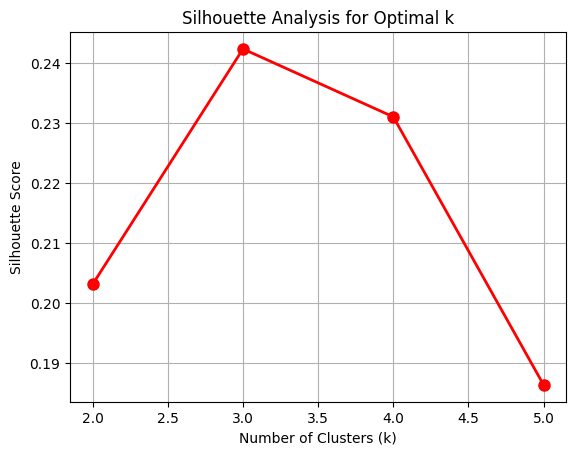

In [19]:
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(music_data_scaled)
    sil_avg = silhouette_score(music_data_scaled, labels)
    sil_scores.append(sil_avg)
    print(f"k={k}, Silhouette Score: {sil_avg:.4f}")

plt.plot(K, sil_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

In [20]:
k = 3  # or 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(music_data_scaled)  # scaled_features = after StandardScaler

# Add to original data
music_data['cluster'] = cluster_labels

In [21]:
# Compute metrics
sil_score = silhouette_score(music_data_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

davies_bouldin_score = davies_bouldin_score(music_data_scaled, cluster_labels)
print("Davies-Bouldin Score:", davies_bouldin_score)


Silhouette Score: 0.2424
Davies-Bouldin Score: 1.5699416879877057


In [22]:
# Compute mean feature values per cluster
cluster_profiles = music_data.groupby('cluster')[features].mean()
print("\nCluster Profiles (Mean Feature Values):\n")
print(cluster_profiles.round(3))


Cluster Profiles (Mean Feature Values):

         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.486   0.311   -13.209        0.060         0.750   
1               0.627   0.693    -7.609        0.075         0.259   
2               0.664   0.467   -13.364        0.830         0.586   

         instrumentalness  liveness  valence    tempo  duration_ms  
cluster                                                             
0                   0.169     0.182    0.413  111.933   223500.905  
1                   0.051     0.200    0.666  124.905   226568.205  
2                   0.001     0.435    0.584  100.387    97522.338  


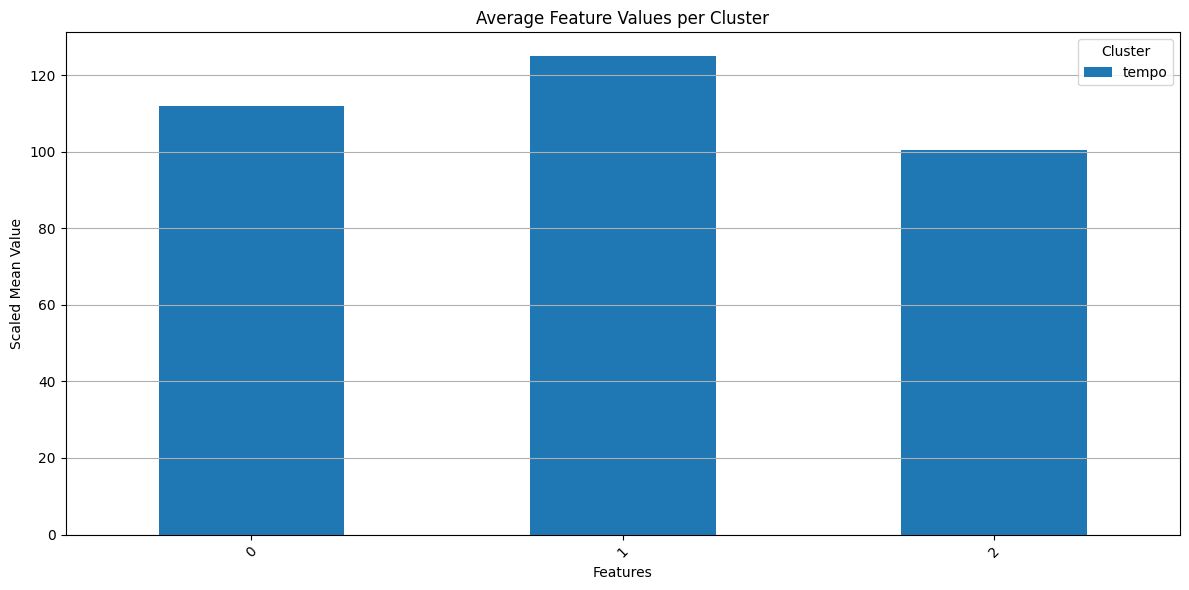

In [23]:
# Visualize cluster profiles
cluster_profiles["tempo"].plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values per Cluster')
plt.ylabel('Scaled Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

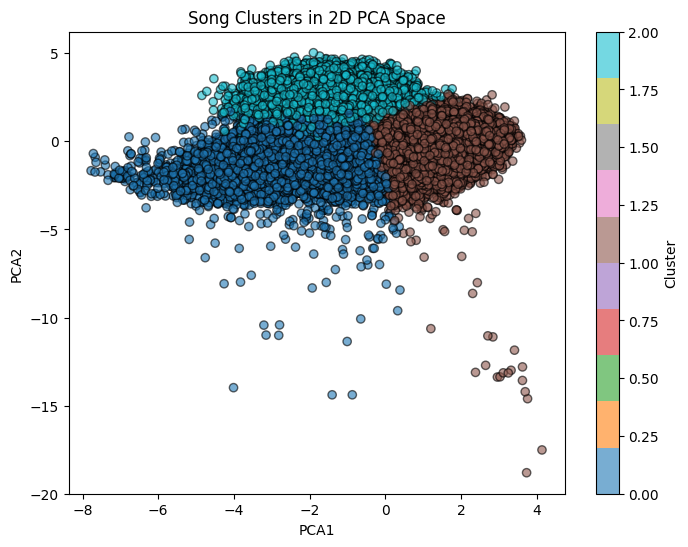

In [24]:
# Dimensionality Reduction with PCA
# -------------------------------
from sklearn.decomposition import PCA #Principal component analysis
pca = PCA(n_components=2)
music_data[['pca1', 'pca2']] = pca.fit_transform(music_data_scaled)

# Step 3: Visualization
plt.figure(figsize=(8,6))
plt.scatter(music_data['pca1'], music_data['pca2'], c=music_data['cluster'], cmap='tab10', alpha=0.6, edgecolor='k')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Song Clusters in 2D PCA Space")
plt.colorbar(label="Cluster")  # adds legend for clusters
plt.show()

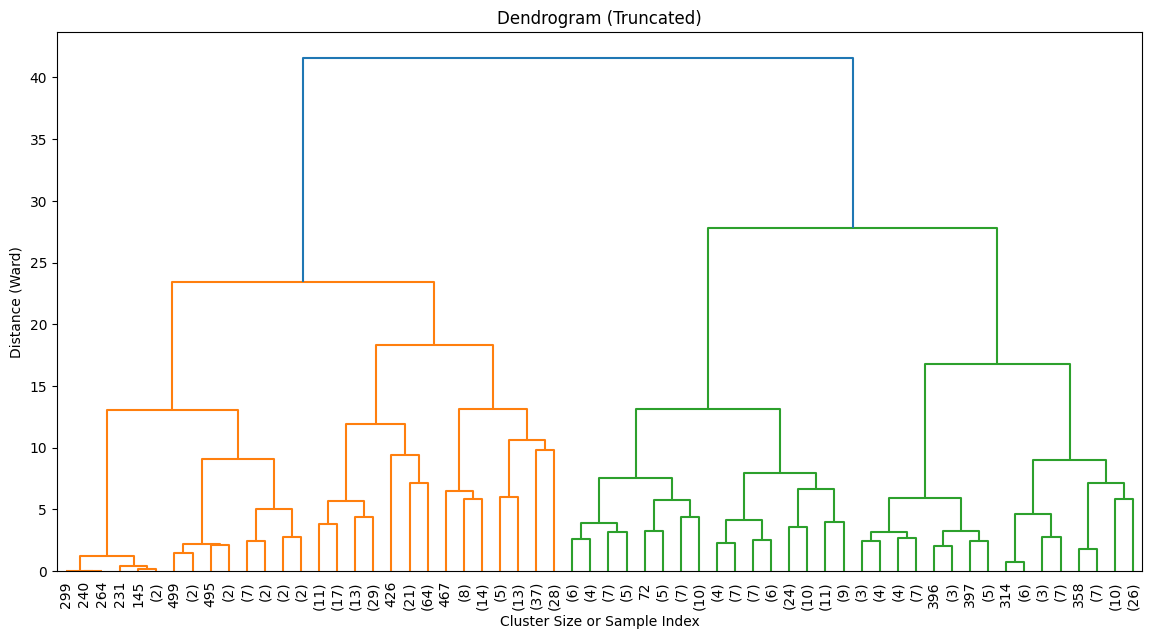

In [25]:
#dendrogram display
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a sample (e.g., first 500 songs) for dendrogram — full dataset is too slow
sample_size = min(500, len(music_data_scaled))
X_sample = music_data_scaled[:sample_size]

# Compute linkage
linked = linkage(X_sample, method='ward')  # 'ward' minimizes within-cluster variance

# Plot
plt.figure(figsize=(14, 7))
dendrogram(linked,
           truncate_mode='level',
           p=5,  # show last 5 merges
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrogram (Truncated)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance (Ward)')
plt.grid(False)
plt.show()

In [26]:
# Hierarchical Clustering on Sampled Data
# -------------------------------


# Sample 3000 rows for hierarchical clustering
sample_size = 3000
np.random.seed(42)  # for reproducibility
sample_indices = np.random.choice(music_data_scaled.shape[0], size=sample_size, replace=False)
X_sample = music_data_scaled[sample_indices]

# Apply clustering on sample
k = 4
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
cluster_labels_hc = hc.fit_predict(X_sample)

# Assign cluster labels to original dataframe for the sampled rows
music_data['cluster_hc'] = np.nan  # initialize with NaN
music_data.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc

# Optional: Create sampled df with labels
df_sampled = music_data.iloc[sample_indices].copy()
df_sampled['cluster_hc'] = cluster_labels_hc
music_data['cluster_hc'] =df_sampled['cluster_hc']

# Evaluate
score = silhouette_score(X_sample, cluster_labels_hc)
print(f"✅ Hierarchical clustering applied on {sample_size} samples.")
print(f"✅ Hierarchical ({k} clusters) → Silhouette Score: {score:.4f}")

✅ Hierarchical clustering applied on 3000 samples.
✅ Hierarchical (4 clusters) → Silhouette Score: 0.2160


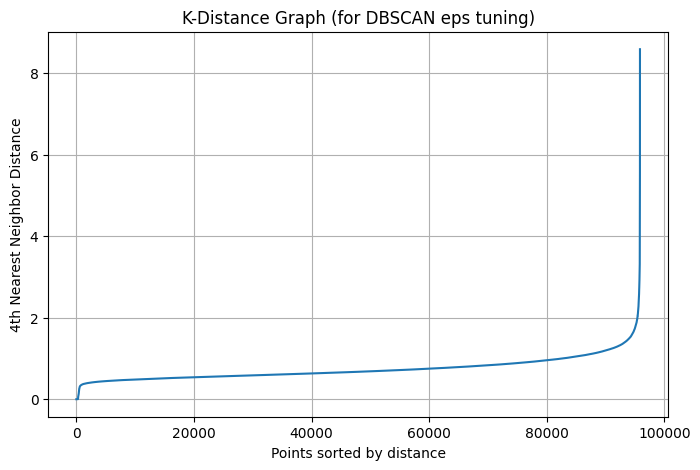

In [27]:
# Calculate distance to 4th nearest neighbor (min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(music_data_scaled)
distances, indices = neighbors_fit.kneighbors(music_data_scaled)

# Sort distances
distances = np.sort(distances[:, 3], axis=0)  # 4th column

# Plot
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-Distance Graph (for DBSCAN eps tuning)')
plt.grid(True)
plt.show()

In [28]:
# DBSCAN Clustering with Dimensionality Reduction

# Parameters
max_samples = 50000

# Step 0: Slice only if needed
if music_data_scaled.shape[0] > max_samples:
    X_scaled = music_data_scaled[:max_samples]
    music_data_limited = music_data.iloc[:max_samples].copy()
else:
    X_scaled = music_data_scaled
    music_data_limited = music_data.copy()

# Step 1: Reduce dimensionality
pca = PCA(n_components=10, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

# Step 2: Run DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=4, algorithm='ball_tree')
cluster_labels_dbscan = dbscan.fit_predict(X_reduced)

# Step 3: Add labels
music_data_limited['cluster_dbscan'] = cluster_labels_dbscan
music_data['cluster_dbscan']=music_data_limited['cluster_dbscan']

# Step 4: Print results
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 4
Estimated number of noise points: 72


In [29]:
cluster_labels = {
    0: 'Instrumental / Acoustic',
    1: 'Mainstream / Party',
    2: 'Happy / Dance',
    3: 'Vocal / Speech-heavy',
    4: 'Chill / Relaxing'
}
music_data['Cluster_Label'] = music_data['cluster'].map(cluster_labels)

In [30]:
print("=======================================")
print("📊 CLUSTERING METHOD COMPARISON")
print("=======================================")

# ✅ KMEANS — Full dataset
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(music_data_scaled)
sil_kmeans = silhouette_score(music_data_scaled, cluster_labels_kmeans)
print(f"KMeans         (k=3) → Silhouette Score: {sil_kmeans:.4f}")

# ✅ DBSCAN — Use limited dataset and filter noise
mask = cluster_labels_dbscan != -1
if mask.sum() > 1 and len(set(cluster_labels_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_reduced[mask], cluster_labels_dbscan[mask])
    print(f"DBSCAN             → Silhouette Score: {sil_dbscan:.4f}")
else:
    print("DBSCAN             → Not enough clusters for silhouette score")

# ✅ HIERARCHICAL — Sampled data
score_hc = silhouette_score(X_sample, cluster_labels_hc)
print(f"Hierarchical   (k=3) → Silhouette Score: {score_hc:.4f}")

📊 CLUSTERING METHOD COMPARISON
KMeans         (k=3) → Silhouette Score: 0.2424
DBSCAN             → Silhouette Score: 0.3938
Hierarchical   (k=3) → Silhouette Score: 0.2160


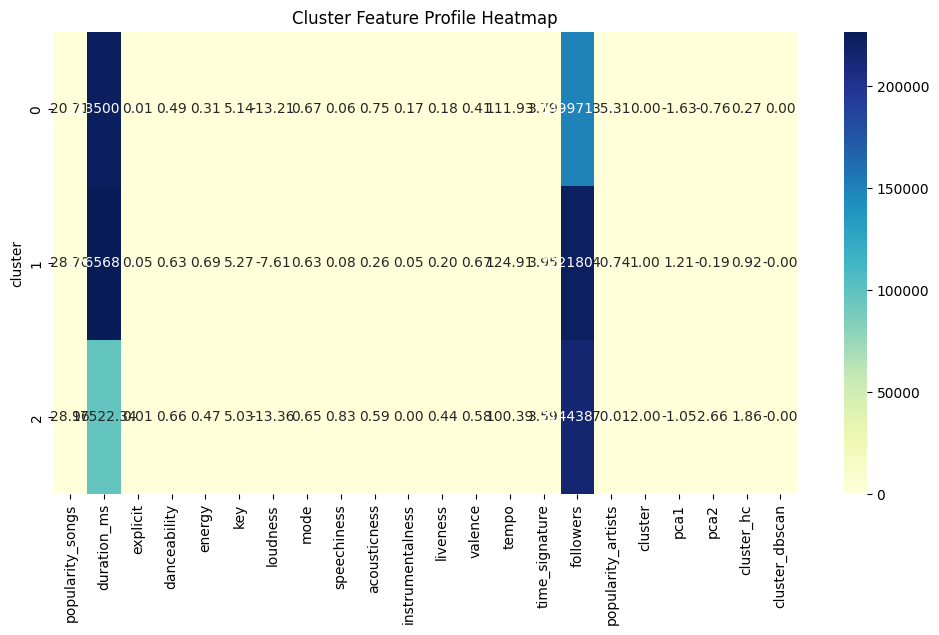

In [31]:
# Heatmap of Cluster Profiles
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = music_data.select_dtypes(include=np.number)

# Compute mean of numeric features per cluster
cluster_profile = numeric_df.groupby(music_data['cluster']).mean()

# Plot heatmap safely
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Feature Profile Heatmap")
plt.show()

In [32]:
# ...existing code...
music_data['cluster_hc'] = np.nan  # initialize with NaN
music_data.loc[sample_indices, 'cluster_hc'] = cluster_labels_hc  # assign only to sampled rows
# ...existing code...

In [33]:
music_data


,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,...,time_signature,followers,genres,popularity_artists,cluster,pca1,pca2,cluster_hc,cluster_dbscan,Cluster_Label
0,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,-13.757,1,...,3,5078.0,['vintage chanson'],22,0,-1.676304,0.291571,NaN,0.0,Instrumental / Acoustic
1,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,-15.375,1,...,3,5078.0,['vintage chanson'],22,0,-2.639968,-0.472803,NaN,0.0,Instrumental / Acoustic
2,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,-15.514,1,...,4,5078.0,['vintage chanson'],22,0,-2.537328,0.474464,NaN,0.0,Instrumental / Acoustic
3,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,-12.393,0,...,4,5078.0,['vintage chanson'],22,0,-0.677418,0.709757,NaN,0.0,Instrumental / Acoustic
4,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,-13.806,1,...,4,5078.0,['vintage chanson'],22,0,-1.480657,1.426716,NaN,0.0,Instrumental / Acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,-6.356,1,...,4,16057.0,['alt z'],56,1,1.600113,-0.357294,NaN,NaN,Mainstream / Party
95833,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,-3.639,1,...,4,929.0,['chinese viral pop'],36,1,1.248094,-1.399771,NaN,NaN,Mainstream / Party
95834,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,-28.573,1,...,4,23.0,['instrumental lullaby'],52,0,-4.467784,0.402899,NaN,NaN,Instrumental / Acoustic
95835,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,-25.551,1,...,3,91.0,['instrumental lullaby'],55,0,-4.789999,-0.722302,NaN,NaN,Instrumental / Acoustic


In [34]:
# Save clustering results for all methods

final_output = music_data[[
    'genres',
    'danceability', 'energy', 'valence', 'tempo',
    'cluster', 'cluster_dbscan', 'cluster_hc','Cluster_Label'
]].copy()

final_output.to_csv('amazon_music_clusters_all_methods.csv', index=False)
print("✅ Saved clustering results for all methods.")

✅ Saved clustering results for all methods.
